/Applications/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


topic:  1
ai business research model management intelligence artificial review decision strategy
topic:  2
platform firm digital competition strategy feature network resource incumbent study
topic:  3
digital insurance industry iot transformation technology provide models new enterprise
topic:  4
ecosystem smart home approach strategy form present challenge related value


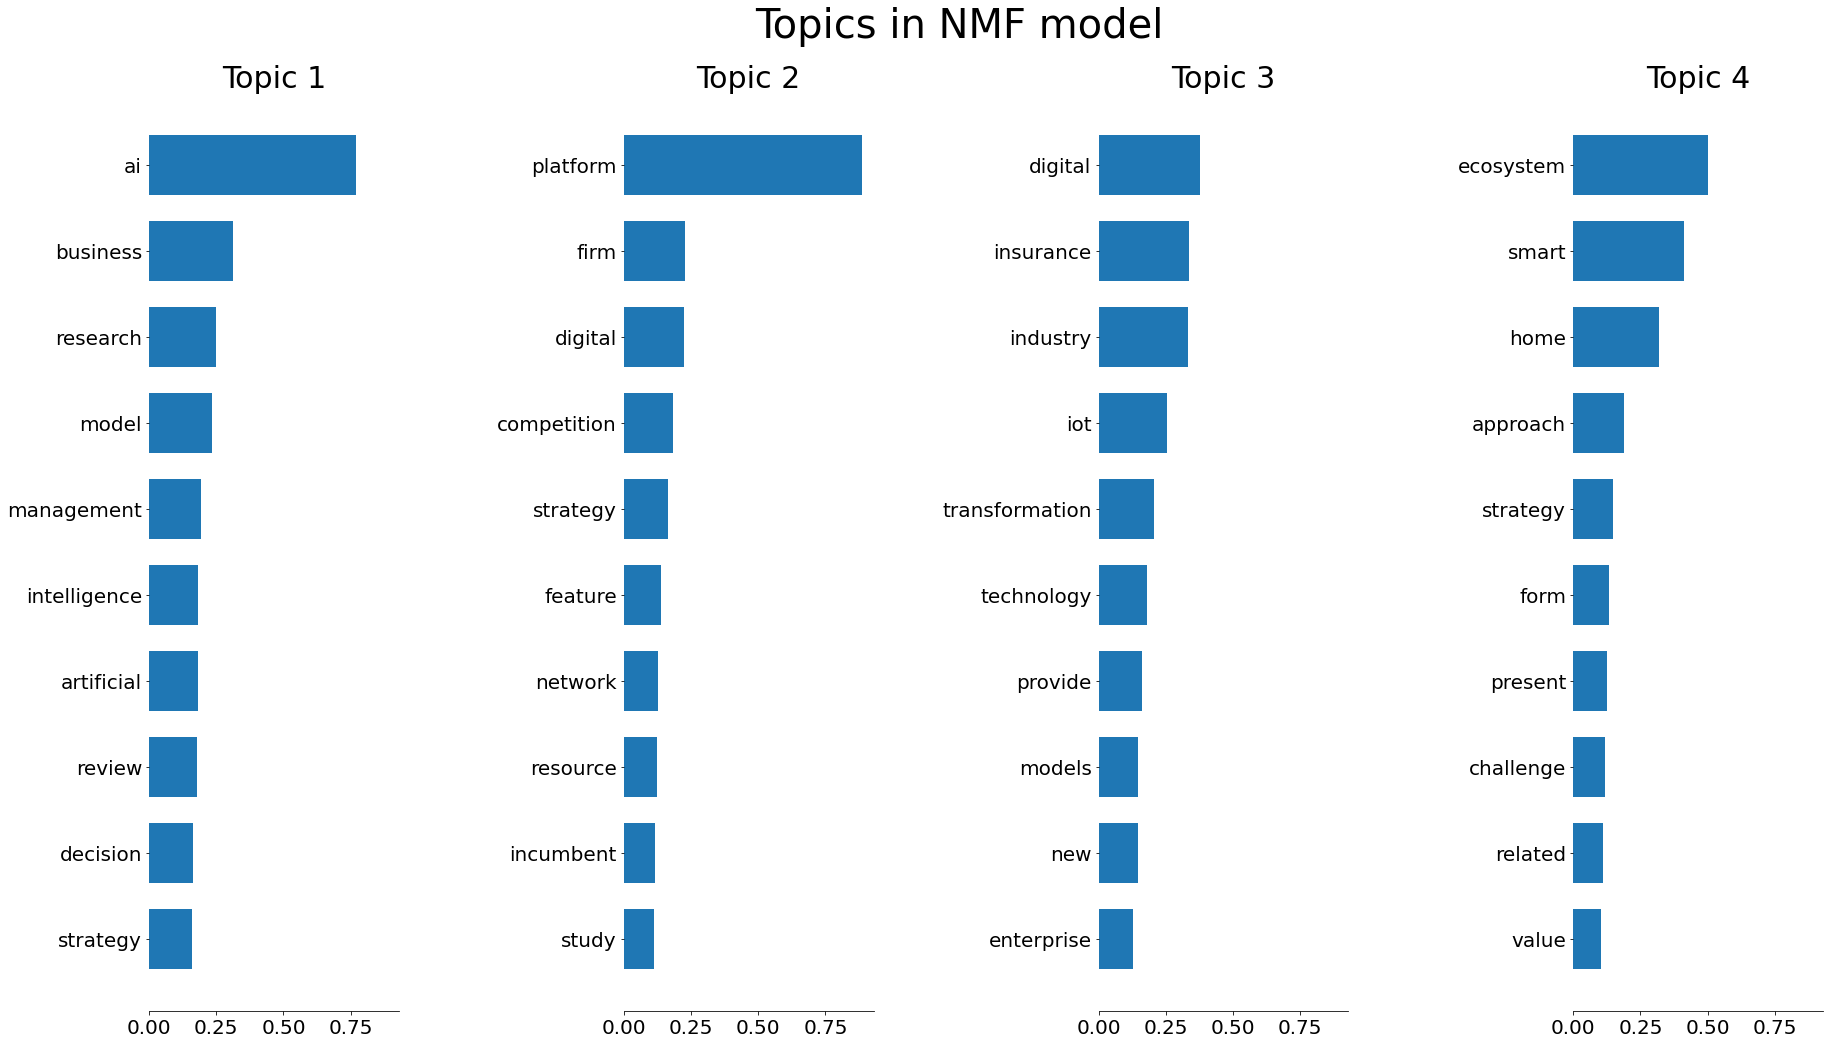

In [1]:
from sklearn.decomposition import NMF, LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud


def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(1, len(model.components_), figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.savefig('Main topics.pdf')
    

def cloudword(model):
    clusters = []
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[: -n_top_words - 1: -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]
        cluster = {}
        for n, m in zip(top_features, weights):
            cluster.update({n: m})
        clusters.append(cluster)

    for i in range(len(model.components_)):
        plt.figure()
        plt.imshow(WordCloud(background_color='white', prefer_horizontal=1.0)
                       .fit_words(clusters[i]))
        plt.axis("off")
        plt.title("Topic " + str(i + 1))
        plt.savefig('Topics wordcloud.pdf')

lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

data = []

# reading and lemamatize the input txt files
for i in range(1,56): 
    text= "input files/review"+ str(i) + ".txt"
    fileObject = open(text, "r", )
    singtext=""
    for words in fileObject.read().split(' '):
        if lemmatizer.lemmatize(words)!= 'ha':
            singtext+= lemmatizer.lemmatize(words) + " "
            #singtext+= stemmer.stem(words) + " "
    data.append(singtext)

# Get the TFIDF matrix of the input data
vectorizer = TfidfVectorizer(max_df=.9, min_df=3, stop_words="english", ngram_range=(1,1))

tfidf = vectorizer.fit_transform(data)

# Number of topics
n_topics=4

# NMF model
nmf = NMF(
    n_components=n_topics,
    random_state=1,
    beta_loss="kullback-leibler",
    solver="mu",
    max_iter=1000,
    alpha=0.2,
    l1_ratio=0.5,
).fit(tfidf)

feature_names = vectorizer.get_feature_names()
n_top_words=10
for topic_idx, topic in enumerate(nmf.components_):
    list_words=[]
    print("topic: ", topic_idx+1)
    topics = topic.argsort()[: -n_top_words - 1 : -1]
    print(' '.join([feature_names[i] for i in topics]))

plot_top_words(nmf, feature_names, 10, "Topics in NMF model")


In [75]:
from sklearn.cluster import KMeans
import pandas as pd

# Topic modeling with K-means

num_clusters=4
kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(tfidf)
df=pd.DataFrame(kmeans.cluster_centers_, columns= feature_names)

for i in range(num_clusters):
    print('Topic', i, '\n', df.iloc[i:i+1].apply(lambda s: s).max().nlargest(10))

Topic 0 
 digital       0.079028
ecosystem     0.066443
insurance     0.059281
industry      0.058448
business      0.055581
strategy      0.054156
research      0.036166
technology    0.035930
company       0.035432
model         0.035030
dtype: float64
Topic 1 
 ai            0.587877
business      0.115012
model         0.109322
making        0.098948
decision      0.093865
strategy      0.088160
value         0.076513
strategic     0.067659
technology    0.067504
artificial    0.066811
dtype: float64
Topic 2 
 platform       0.648178
competition    0.125429
digital        0.111153
resource       0.101311
firm           0.097131
feature        0.089683
incumbent      0.084807
ecosystem      0.081866
network        0.075662
value          0.072377
dtype: float64
Topic 3 
 smart      0.577081
home       0.495619
iot        0.114165
related    0.106386
value      0.091781
paper      0.088400
provide    0.084799
future     0.083964
used       0.072556
product    0.066191
dtype: float64


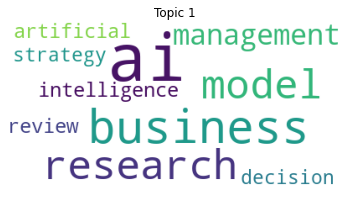

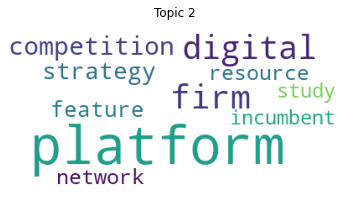

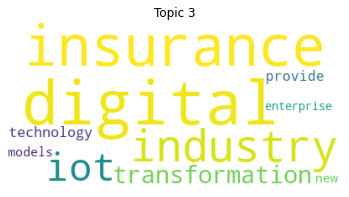

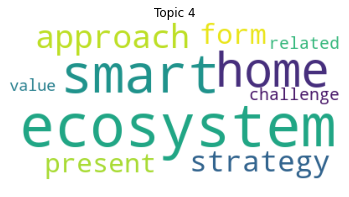

In [66]:
cloudword(nmf)

Topic:  1
ai platform strategy ecosystem firm business research value decision strategic
Topic:  2
organizational provide change derive basis perspective framework goal shift agenda
Topic:  3
artificial interface growth make implement decade relationship industry product key
Topic:  4
insurance digital industry company model business smart transformation new ai


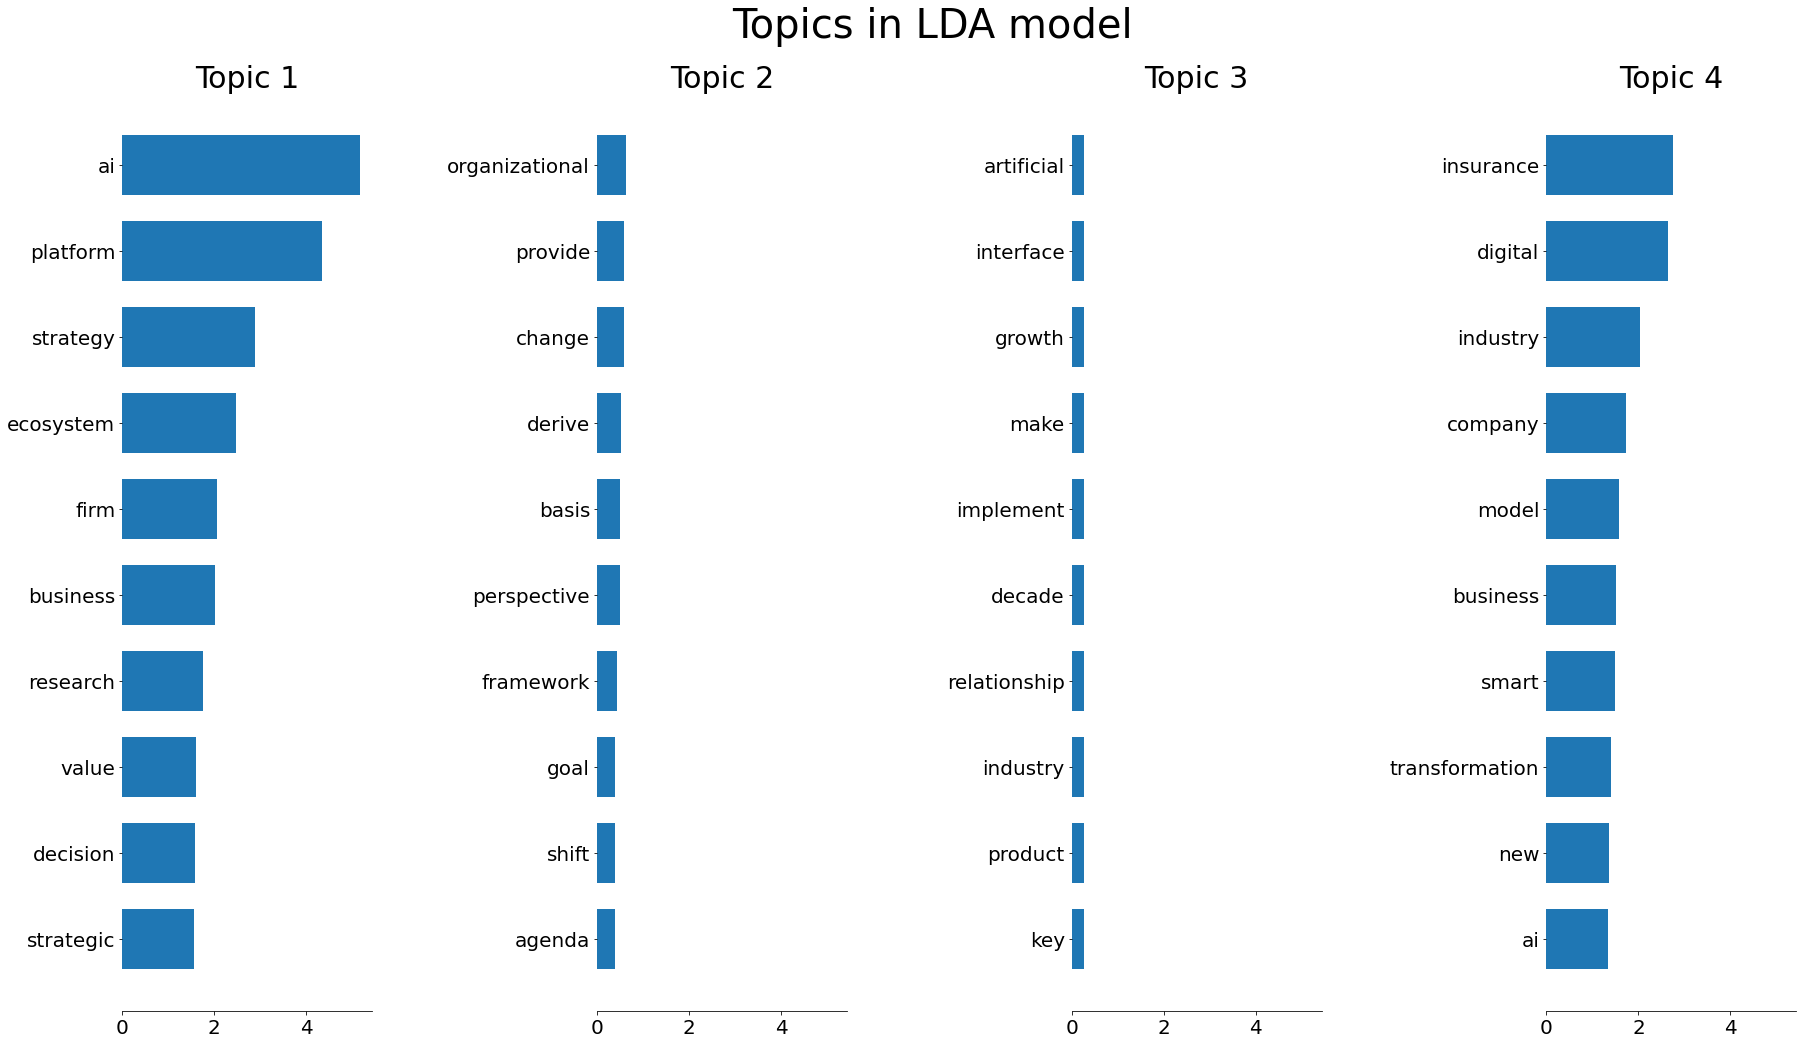

In [157]:
lda = LatentDirichletAllocation(
    n_components=n_topics,
    max_iter=100,
    learning_method="online",
    learning_offset=50.0,
    random_state=8,
)
lda.fit(tfidf)

for topic_idx, topic in enumerate(lda.components_):
    print("Topic: ", topic_idx+1)
    topics = topic.argsort()[: -n_top_words - 1 : -1]
    print(' '.join([feature_names[i] for i in topics]))

plot_top_words(lda, feature_names, 10, "Topics in LDA model")

AI 0.21709028895072224
platform 0.19735480813702022
digital 0.1455491710010524
business 0.13321449549248865
ecosystem 0.1258136901873504
strategy 0.12334675508563764
research 0.10607820937364837
value 0.09867740406851011
technology 0.08140885835652084
model 0.07647498815309534
industry 0.07400805305138258
new 0.07400805305138258
strategic 0.06907418284795708
smart 0.06660724774624432
paper 0.06660724774624432
['AI', 'platform', 'digital', 'business', 'ecosystem', 'strategy', 'research', 'value', 'technology', 'model', 'industry', 'new', 'strategic', 'smart', 'paper']


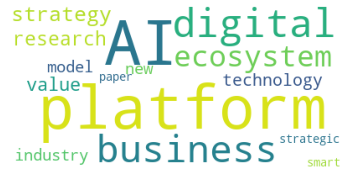

In [13]:
from jieba.analyse import *

data = ""

for i in range(1,56):
    text= "review"+ str(i) + ".txt"
    fileObject = open(text, "r")
    singtext=""
    for words in fileObject.read().split(' '):
        #singtext+= stemmer.stem(words) + " "
        if lemmatizer.lemmatize(words)!= 'their' and lemmatizer.lemmatize(words)!= 'how':
            singtext+= lemmatizer.lemmatize(words) + " "

    data+= singtext + "\n"

cluster = {}
words=[]
for keyword, weight in extract_tags(data,  topK=15, withWeight=True):
    cluster.update({keyword: weight})
    words.append(keyword)
    print('%s %s' % (keyword, weight))
    
plt.figure()
plt.imshow(WordCloud(background_color='white', prefer_horizontal=1.0)
                       .fit_words(cluster))
plt.axis("off")
#plt.title("Frequent terms ")
plt.savefig('Corpus_summary.pdf')
print('15 most common words:', words)

# 